### Question 1
We first created a file for returns of the stocks prices.Then using python ,we created a corelation matrix of of the returns of all 100 companies:
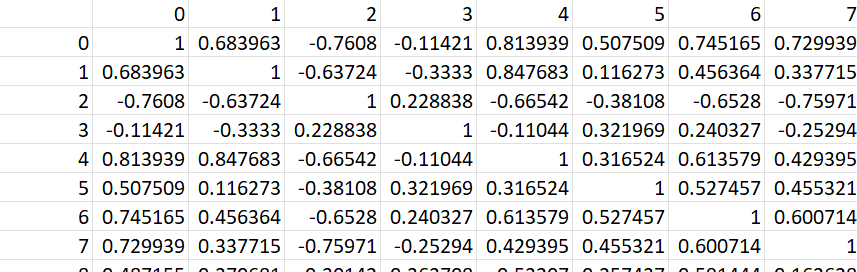

Stock Return Corelation Matrix

Next we plotted scatter plots from these corelation matrix in excel to find out how many sectors were present.
<img src="./img.jpg" />

 From this scatter plot we found that this company was more closely related to 24 other companies rather tahn the rest of the 75 companies.Similarly making more such sctter plots we were able to figure out that there were **4 sectors each with approximately 25 companies**.




### Question 2
Having found that each sector had 25 companies we ran this code find which company belonged to which sector.We created a code using python to find out which company belonged to which sector:

In [2]:
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt


epsilon = 5
data = pd.read_csv(r'./CorrelationMatrix_returns.csv')
df = pd.DataFrame(data)
#buff = np.zeros((101, 100))


x = []
count=0
buff = df.to_numpy()[:, 1:]
b = np.zeros((100,1))
def maxi(arr):
    ans = 0
    for i in len(arr):
        if arr[i] < 1:
            ans = max(ans, arr[i])
    return ans
def search(a) :
    print(a, end = ": ")
    count = 0 
    if a not in x :
        b[a] = 1 
        x.append(a)
        for i in range(100) :
            if (buff[a][i] > 0.12 and buff[a][i] < 1)  :
                #print(i, "called inside search of ", a)
                print(i, end = " ")
                count+=1
#print(buff)
    print("", end = "\n")
    return count

for i in range(100) :
    search(i)
#print(sorted(x))
#print(len(x))

0: 1 20 21 22 25 26 38 39 43 45 49 54 67 75 78 79 82 88 90 97 98 99 
1: 0 26 38 39 43 45 49 54 67 75 78 79 82 88 90 
2: 3 16 23 28 32 33 42 47 51 53 58 60 63 66 72 81 87 91 98 
3: 2 42 47 51 53 58 60 63 66 72 81 87 91 98 99 
4: 49 67 75 78 79 82 88 90 
5: 61 64 65 68 70 76 83 85 86 89 93 94 95 97 
6: 47 51 53 60 63 66 72 81 87 91 98 
7: 32 42 47 51 53 58 60 63 66 72 81 87 91 98 
8: 52 55 57 59 69 71 73 74 77 80 84 92 96 99 
9: 47 51 53 60 63 66 72 81 87 91 98 
10: 49 54 67 75 78 79 82 88 90 
11: 26 38 39 43 49 54 67 75 78 79 82 88 90 
12: 52 55 57 59 69 71 73 74 77 80 84 92 96 99 
13: 34 48 56 61 62 64 65 68 70 76 83 85 86 89 93 94 95 97 
14: 26 38 39 49 54 67 75 78 79 82 88 90 
15: 34 37 48 56 61 62 64 65 68 70 76 83 85 86 89 93 94 95 97 
16: 2 42 47 51 53 58 60 63 66 72 81 87 91 98 
17: 47 51 53 60 63 66 72 81 87 91 98 
18: 22 25 26 38 39 43 45 49 54 67 75 78 79 82 88 90 
19: 42 47 51 53 60 63 66 72 81 87 91 98 
20: 0 22 25 26 38 39 43 45 49 54 67 75 78 79 82 88 90 
21: 0 22 25 26 38

Basically what this code does is the group the companies whose corelation are greater than **0.12** . Observing these values carefully we were able to finally figure out which company belings to which sector.:

**Sector 0: 0 1 4 10 11 14 18 20 21 22 25 26 38 39 43 45 49 54 67 75 78 79 82 88 90**

**Sector 1: 2 3 6 7 9 16 17 19 23 28 32 33 42 47 51 53 58 60 63 66 72 81 87 91 98**

**Sector 2: 5 13 15 24 31 34 35 37 48 56 61 62 64 65 68 70 76 83 85 86 89 93 94 95 97**

**Sector 3: 8 12 27 29 30 36 40 41 44 46 50 52 55 57 59 69 71 73 74 77 80 84 92 96 99**

### Question 3
For question we apllied two approaches to fit the data. 

**1. Neural Network**

**2. Linear Regression**

We first created the Index return through a python program. In the first approach that is the neural network we took the last 10 K index returns of an index as training data set, and tried used 25 companies from a sector as a input. The following code trains the data set to fit the input from sector 1 to index 0.

In [4]:
import torch.nn as nn
import torch 
import numpy as np
import random
import pandas as pd
from tqdm import tqdm
batch_size = 2000
def get_sample(t1, t2, n2, index):
    s = t2 - t1
    inputs = torch.empty((s,25), dtype = torch.float)
    targets = torch.empty((s,1), dtype = torch.float)
    for i in range(t1, t2):
        targets[i-t1][0] = index[i]
        inputs[i-t1] = torch.from_numpy(n2[i]).type(torch.float)
    
    return (inputs, targets)


s = 1000
def get_values(batch_size):
    x = 199999
    ret = []
    while(x>189999):
        ret.append((x, x- batch_size))
        x -= batch_size
    return ret


data = pd.read_csv(r'./data_challenge_stock_prices_returns_inbps.csv')
df = pd.DataFrame(data)
g1 = [0,1,4,10,11,14,18,20,21,22,25,26,38,39,43,45,49,54,67,75,78,79,82,88,90]
n1 = df.to_numpy()
n2 = np.zeros((199999, 25))

data = pd.read_csv(r'./index_returns.csv')
df = pd.DataFrame(data)
index = df.to_numpy()
index = index[:, 1]



count = 0
for i in g1 : 
    n2[:, count] = n1[:, i]
    count+=1


input_size = 25
hidden_sizes = [4, 2]
output_size = 1# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
epochs = 50000
#inputs = torch.from_numpy(n2).type(torch.float)

sample_list = []
for t2, t1 in get_values(batch_size):
    inputs, targets = get_sample(t1, t2, n2, index)
    sample_list.append((inputs, targets))

# Train the neural network
'''
for epoch in tqdm(range(epochs)):
    for inputs, targets in sample_list:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save
'''

model = torch.jit.load('model_scripted.pt')
model.eval()


test_inputs, test_targets  = get_sample(1, 199999, n2, index)
test_outputs = model(test_inputs)

test_targets = torch.flatten(test_targets)
test_outputs = torch.flatten(test_outputs)

T = torch.stack((test_targets, test_outputs))
print(torch.corrcoef(T))


tensor([[1.0000, 0.4320],
        [0.4320, 1.0000]], grad_fn=<ClampBackward1>)


From this corelation factor: we found that this index is related with the the first sector. Next when we tried to train this network with we got corelation of **0.27** with index 7 while corelation of **0.06** with index 1. Therefore we concluded that that index 2 was somewhat related to sector 0 although not exactly and sector 0 was not related to index 1 at all. Also we cant get much information about the functional form of the indices to do that we followed the Linear Regression approach.


Here's the code for Linear Regression Model. This code gives the corelation of the fit data with the data trained by linear regression model with sector 0 as input and all the 15 indices as output

In [8]:
import torch.nn as nn
import torch 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import linear_model

data = pd.read_csv(r'./data_challenge_stock_prices_returns_inbps.csv')
df = pd.DataFrame(data)
g1 = [0,1,4,10,11,14,18,20,21,22,25,26,38,39,43,45,49,54,67,75,78,79,82,88,90]
n1 = df.to_numpy()
n2 = np.zeros((199999, 25))

i = 0
data = pd.read_csv(r'./index_returns.csv')
df = pd.DataFrame(data)
          #choosing index id = i

count = 0
for i in g1 : 
    n2[:, count] = n1[:, i]
    count+=1
for k in range(0, 15):
    index = df.to_numpy()[:, 1:]   #Slicing timestamp column
    index = index[:, k]  

    regr = linear_model.LinearRegression()
    regr.fit(n2, index)
    prediction = regr.predict(n2[:, :])
    #print(prediction)
    print(np.corrcoef(np.vstack((prediction, index[:])))[0][1])
#plt.plot(prediction[:50], color = "orange")
#plt.plot(index[:50], color = "blue")
#plt.show()

#print("Regression coefficients are: ", regr.coef_)
#print("e_i is: ", regr.intercept_)


0.4456744290786725
0.06727916939915216
0.2122272054434562
0.04318548570362192
0.10138319079420977
0.03811915957688861
0.09653442812520431
0.30549805489790977
0.06301612524299878
0.044699748912696895
0.025166957317143596
0.010024456237512159
0.014447073923305435
0.008423387106313676
0.026955155915319426


<img src="./img2.jpg" />

In this approach too , we noticed the same corelation, but here we also printed the weights of the linear regression model, we notice that almost all the weights have same value  . This led us to believe that the index must be a function of the **average of returns** of the stocks in that sector.

We knew that sector 0 and index 7 are also related but not that but the index function is not the average of returns of the stocks. So we added a cloumn of minimum (of the 25 companies) return to the regression model . 

<img src="./img3.jpg" />

And **Eureka!!** , suddenly the corelation became more than 40% and we noticed that the weight of the minimum value in the regression weights was maximum and way more than the other weights . So we were able to figure out that this index is a function of the **minimum of returns** of the stocks at a paricular time,
We can say that the indices can be function of two types:

**1) Average of returns**

**2)Minimum of returns**

Here are the weights and corelations of various sectors with indices and the type of function that index is 

1) Sector 1, Index 6 , Average of return

<img src="./img4.jpg" />


2) Sector 1 , Index 8, Minimum of returns

<img src="./img5.jpg" />


3)Sector 2 , Index 1 , Minimum of returns

<img src="./img6.jpg" />


4) Sector 3, Index 4 , Average of returns

<img src="./img7.jpg" />


5)Sector 0, Index 2: Note that here we couldnt find the exact form of the function 

<img src="./img8.jpg" />


6)Sector 1 , Index 3: 22 stocks with significant and identical weights, just different signs

<img src="./img9.jpg" />

7)Sector 2 , Index 5 : Note that here we couldnt find the exact form of the function 

<img src="./img10.jpg" />


8)Sector 2, Index 10 : 22 stocks with significant and identical weights, just different signs

<img src="./img11.jpg" />

9)Sector 3, Index 9 : 21 stocks with significant and identical weights, just different signs

<img src="./img12.jpg" />

##### Summary of Task 3

Sector 0: 0-Average, 7-Min, 2 

Sector 1: 6-Average, 8-Min, 3

Sector 2: 1-Min, 10-Alternate signs, 5, 6

Sector 3: 4-Average, 9-Alternate signs, 14


Index 11,12,13 do not correspond to any particular sector, thus they may be dependent on the whole 100 stocks. Fitting linear on all 100 Stocks did not give a satisfactory result so they are not included in the further parts.

### Question 4
Below is the correlation matrix for the Index predictions of some Indices which we could find. Here k = 8.
Indices = 0,1,4,6,7,8,9,10

In [11]:
import torch.nn as nn
import torch 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import linear_model
from math import fabs

data = pd.read_csv(r'./index_predictions.csv')
df = pd.DataFrame(data)
corrM = df.corr()
print(corrM)




           0         1         4         6         7         8         9  \
0   1.000000  0.120067  0.197925  0.191271  0.671535  0.127413 -0.111359   
1   0.120067  1.000000  0.122214  0.136981  0.082094  0.094801 -0.084615   
4   0.197925  0.122214  1.000000  0.172278  0.133859  0.117654 -0.481223   
6   0.191271  0.136981  0.172278  1.000000  0.131417  0.678028 -0.105854   
7   0.671535  0.082094  0.133859  0.131417  1.000000  0.087397 -0.078604   
8   0.127413  0.094801  0.117654  0.678028  0.087397  1.000000 -0.073718   
9  -0.111359 -0.084615 -0.481223 -0.105854 -0.078604 -0.073718  1.000000   
10 -0.060621 -0.346438 -0.062129 -0.084004 -0.044415 -0.059707  0.050617   

          10  
0  -0.060621  
1  -0.346438  
4  -0.062129  
6  -0.084004  
7  -0.044415  
8  -0.059707  
9   0.050617  
10  1.000000  
